In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as sps
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

## Подготовка данных

In [2]:
df = pd.read_csv('yellow_tripdata_2020-01.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [5]:
df.shape

(6405008, 18)

In [6]:
df.isna().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [9]:
df['total_amount'] = df['total_amount'].astype('int64')

<ipython-input-9-726cfcb3ea30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_amount'] = df['total_amount'].astype('int64')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6339567 entries, 0 to 6339566
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           int64  
 17  congestion_surcharge   float64
dtypes: float64(12), int64(3), object(3)
memory usage: 919.0+ MB


In [11]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17,2.5
6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20,2.5
6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19,2.5
6339565,2.0,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,N,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12,2.5


In [12]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

<ipython-input-12-563097f526d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


In [13]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

<ipython-input-13-6e7bcef0194b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


## Коррелиация стоимости поездки с другими факторами

In [14]:
numeric_col = ['passenger_count','trip_distance','RatecodeID','PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'congestion_surcharge']

In [15]:
corr_matrix = df.loc[:,numeric_col].corr()
print(corr_matrix)

                      passenger_count  trip_distance  RatecodeID  \
passenger_count              1.000000       0.010643   -0.003391   
trip_distance                0.010643       1.000000    0.149053   
RatecodeID                  -0.003391       0.149053    1.000000   
PULocationID                -0.004243      -0.099022   -0.009819   
DOLocationID                -0.003451      -0.104075    0.003530   
payment_type                 0.010280      -0.016014    0.006312   
fare_amount                  0.006597       0.846793    0.250237   
congestion_surcharge         0.013468      -0.211379   -0.107421   

                      PULocationID  DOLocationID  payment_type  fare_amount  \
passenger_count          -0.004243     -0.003451      0.010280     0.006597   
trip_distance            -0.099022     -0.104075     -0.016014     0.846793   
RatecodeID               -0.009819      0.003530      0.006312     0.250237   
PULocationID              1.000000      0.098963     -0.030677    -0.08

<AxesSubplot:>

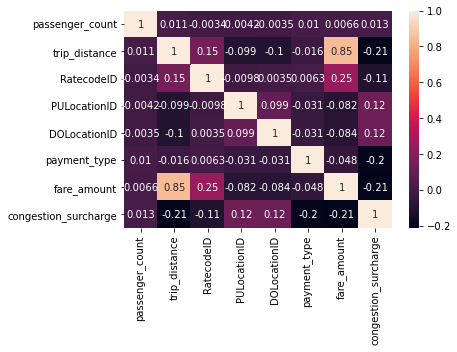

In [16]:
sns.heatmap(corr_matrix, annot=True)

Видно, что стоимость поездки наиболее коррелирует с дистанцией поездки.


## Аномальные поездки

In [18]:
df['datediff'] = df['tpep_dropoff_datetime'] -df['tpep_pickup_datetime']

<ipython-input-18-90f7ff219c74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datediff'] = df['tpep_dropoff_datetime'] -df['tpep_pickup_datetime']


In [19]:
df['datediff']=pd.to_timedelta(df['datediff'])

<ipython-input-19-486c49d5f014>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datediff']=pd.to_timedelta(df['datediff'])


In [20]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,datediff
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4,0.0,0 days 00:02:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17,2.5,0 days 00:14:14
6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20,2.5,0 days 00:19:00
6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19,2.5,0 days 00:16:17
6339565,2.0,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,N,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12,2.5,0 days 00:09:38


In [21]:
df['time_in_road_sec'] = df['datediff'].dt.total_seconds().astype(float)

<ipython-input-21-f2189212ac1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_in_road_sec'] = df['datediff'].dt.total_seconds().astype(float)


In [22]:
 df.query("time_in_road_sec< 60")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,datediff,time_in_road_sec
5,2.0,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,N,7,193,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3,0.0,0 days 00:00:53,53.0
6,2.0,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.01,0.0,0.3,3,0.0,0 days 00:00:04,4.0
372,2.0,2020-01-01 00:57:13,2020-01-01 00:58:05,1.0,0.11,1.0,N,260,260,3.0,-2.50,-0.5,-0.5,0.00,0.0,-0.3,-3,0.0,0 days 00:00:52,52.0
373,2.0,2020-01-01 00:57:13,2020-01-01 00:58:05,1.0,0.11,1.0,N,260,260,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3,0.0,0 days 00:00:52,52.0
667,2.0,2020-01-01 00:36:31,2020-01-01 00:37:23,3.0,0.18,1.0,N,141,141,3.0,-3.00,-0.5,-0.5,0.00,0.0,-0.3,-6,-2.5,0 days 00:00:52,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339382,2.0,2020-01-31 23:04:47,2020-01-31 23:04:57,4.0,0.00,5.0,N,229,229,1.0,60.00,0.0,0.5,12.66,0.0,0.3,75,2.5,0 days 00:00:10,10.0
6339383,1.0,2020-01-31 23:48:56,2020-01-31 23:49:30,1.0,1.50,5.0,Y,90,90,1.0,61.42,0.0,0.0,12.30,0.0,0.3,74,0.0,0 days 00:00:34,34.0
6339401,2.0,2020-01-31 23:17:48,2020-01-31 23:17:51,5.0,0.00,5.0,N,263,264,1.0,65.00,0.0,0.5,13.16,0.0,0.3,78,0.0,0 days 00:00:03,3.0
6339436,1.0,2020-01-31 23:51:05,2020-01-31 23:51:08,1.0,0.00,1.0,N,132,132,3.0,2.50,0.5,0.5,0.00,0.0,0.3,3,0.0,0 days 00:00:03,3.0


В последнем столбце вычисленна длительность поездки в секундах. Из данных выше видно, что 68310 поездки можно считать аномальными, так как их длительность состовляла меньше 60 секунд.


In [23]:
df.query("fare_amount < 0")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,datediff,time_in_road_sec
160,2.0,2020-01-01 00:54:28,2020-01-01 00:58:41,1.0,0.60,1.0,N,170,137,3.0,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-8,-2.5,0 days 00:04:13,253.0
372,2.0,2020-01-01 00:57:13,2020-01-01 00:58:05,1.0,0.11,1.0,N,260,260,3.0,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3,0.0,0 days 00:00:52,52.0
667,2.0,2020-01-01 00:36:31,2020-01-01 00:37:23,3.0,0.18,1.0,N,141,141,3.0,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-6,-2.5,0 days 00:00:52,52.0
677,2.0,2020-01-01 00:23:15,2020-01-01 00:23:54,2.0,0.09,1.0,N,114,114,3.0,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-6,-2.5,0 days 00:00:39,39.0
1007,2.0,2020-01-01 00:13:39,2020-01-01 00:24:26,2.0,1.26,1.0,N,249,68,4.0,-8.5,-0.5,-0.5,0.0,0.0,-0.3,-12,-2.5,0 days 00:10:47,647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6337812,2.0,2020-01-31 23:24:40,2020-01-31 23:50:34,3.0,4.49,1.0,N,148,48,2.0,-19.5,-0.5,-0.5,0.0,0.0,-0.3,-23,-2.5,0 days 00:25:54,1554.0
6338071,2.0,2020-01-31 23:52:53,2020-02-01 00:22:09,1.0,7.28,1.0,N,229,36,4.0,-25.5,-0.5,-0.5,0.0,0.0,-0.3,-29,-2.5,0 days 00:29:16,1756.0
6338169,2.0,2020-01-31 23:25:44,2020-01-31 23:29:59,1.0,0.96,1.0,N,48,186,4.0,-5.0,-0.5,-0.5,0.0,0.0,-0.3,-8,-2.5,0 days 00:04:15,255.0
6338894,2.0,2020-01-31 23:30:03,2020-01-31 23:38:09,1.0,0.84,1.0,N,48,186,3.0,-6.5,-0.5,-0.5,0.0,0.0,-0.3,-10,-2.5,0 days 00:08:06,486.0


В таблице выше так же привидены аномальные поездки, так как их стоимость была отрицательной, чего быть не может.

## Распределение по стоимости поездок

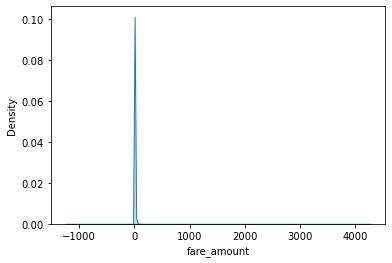

In [24]:
snsplot = sns.kdeplot(df['fare_amount'], shade=True)
fig = snsplot.get_figure()

На приведенном выше графике нельзя сделать вывод о нормальности распределния, поскольку данных слишком много, поэтому в качестве данных мы возьмем среднюю стоимость поездки в каждый день месяца.


In [25]:
df['cal_date'] = df['tpep_pickup_datetime'].dt.date

<ipython-input-25-60278b7b5d99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cal_date'] = df['tpep_pickup_datetime'].dt.date


In [26]:
new_df = df.groupby('cal_date').fare_amount.agg('mean').reset_index().sort_values('cal_date')

In [27]:
new_df

,cal_date,fare_amount
0,2003-01-01,0.000000
1,2008-12-31,20.000000
2,2009-01-01,19.631579
3,2019-12-18,1.255000
4,2019-12-31,12.682171
5,2020-01-01,13.798743
6,2020-01-02,13.338283
7,2020-01-03,12.459488
8,2020-01-04,12.247574
9,2020-01-05,13.125734


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cal_date     51 non-null     object 
 1   fare_amount  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


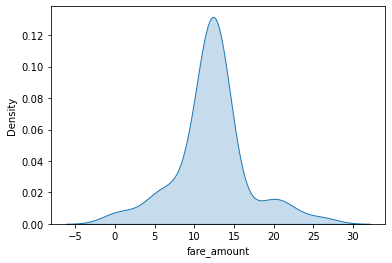

In [29]:
snsplot = sns.kdeplot(new_df['fare_amount'], shade=True)
fig = snsplot.get_figure()

In [30]:
sps.normaltest(new_df.fare_amount)

NormaltestResult(statistic=6.334615600389156, pvalue=0.04211683233801656)

По графику выше можно сказать, что распределение приблизительно является нормальным.

## Построение модели описания тарифа

In [31]:
df. head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,datediff,time_in_road_sec,cal_date
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,...,3.0,0.5,1.47,0.0,0.3,11,2.5,0 days 00:04:48,288.0,2020-01-01
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,...,3.0,0.5,1.50,0.0,0.3,12,2.5,0 days 00:07:25,445.0,2020-01-01
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,...,3.0,0.5,1.00,0.0,0.3,10,2.5,0 days 00:06:11,371.0,2020-01-01
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,...,0.5,0.5,1.36,0.0,0.3,8,0.0,0 days 00:04:51,291.0,2020-01-01
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,...,0.5,0.5,0.00,0.0,0.3,4,0.0,0 days 00:02:18,138.0,2020-01-01


In [32]:
skm = LinearRegression()

In [33]:
X = df.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 
             'payment_type', 'fare_amount',
            'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
            'total_amount', 'datediff', 'cal_date'], axis =1)
Y = df.fare_amount

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [35]:
skm.fit(X_train,Y_train)

LinearRegression()

In [36]:
skm.score(X_train,Y_train)

0.7635816847730844

In [37]:
skm.score(X_test,Y_test)

0.7027258199326496

In [38]:
print(skm.intercept_)
print(skm.coef_)

-7.524602097290362
[-1.32518765e-02  2.57802395e+00  1.88113531e+00  1.39161308e-03
  1.41849561e-03  4.36944640e+01 -1.23168134e+00  5.32603018e-05]


In [39]:
new_price = skm.predict(X)

In [40]:
df1 = pd.DataFrame()

In [41]:
df1 = df1.assign(new_price = skm.predict(X))

In [43]:
df1

,new_price
0,8.151609
1,8.159944
2,6.607797
3,10.074935
4,8.001321
...,...
6339562,10.407535
6339563,10.264611
6339564,11.204809
6339565,8.894408


Видно, что в начале месяца стоимость поездок ниже, чем в конце, думмаю это связано с тем, что была какая-то акция в связи с новогодними праздниками.